## word2vec

In [29]:
import pandas as pd
data = pd.read_csv('../web_crawler_hyeom/KoreaNewsCrawler/OUTPUT/output/other_categories/Article_사회_202001_202003.csv', header=None, error_bad_lines=False)
data.columns = ['date', 'category', 'source', 'title', 'content', 'url']
print(data.shape)

b'Skipping line 42870: expected 6 fields, saw 10\nSkipping line 43043: expected 6 fields, saw 9\n'


(624377, 6)


In [30]:
sample = data.sample(n=10000)
sample.head()

,date,category,source,title,content,url
262504,20200216,사회,YTN,인삼 시장 때아닌 활기...면역력 증진 관심,앵커 코로나19 치료 약이나 백신은 아직 개발되지 않았는데요. 대신 면역력은 높이는...,https://news.naver.com/main/read.nhn?mode=LSD&...
419016,20200305,사회,뉴스1,완도는 지금 비파 수확으로 분주…웰빙과일로 각광,평년보다 3개월 빠른 2월부터 생산…성인병 예방 완도 비파 © 뉴스1 완도 뉴스1 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
198012,20200206,사회,프레시안,태백시 MBC 다큐멘터리 ‘광부의 기억 화광아파트’ 방영,오는 7일 오후 8시 30분 MBC 강원영동서 홍춘봉 기자 태백 강원 태백시 장성 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
454529,20200310,사회,MBC,사교육비 월평균 30만원 첫 돌파,우리나라 초등학생이 작년 쓴 사교육비가 모두 9조6천억 원으로 전년보다 11.8% ...,https://news.naver.com/main/read.nhn?mode=LSD&...
204670,20200206,사회,세계일보,이국종 “병원서 돈 따오라 해 지쳤다”,외상센터장 사임 후 심경 토로 “닥터헬기 5명 필요한데 1명만 타” 경기도 아주대병...,https://news.naver.com/main/read.nhn?mode=LSD&...


In [14]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 277 kB/s eta 0:00:01
     |████████████████████████████████| 86 kB 395 kB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 658 kB/s eta 0:00:01     |███████████████                 | 1.7 MB 1.0 MB/s eta 0:00:02
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.0
    Uninstalling beautifulsoup4-4.9.0:
      Successfully uninstalled beautifulsoup4-4.9.0


In [34]:
from konlpy.tag import Okt
from tqdm import tqdm
okt = Okt()

In [38]:
sample['content'][262504]

'앵커 코로나19 치료 약이나 백신은 아직 개발되지 않았는데요. 대신 면역력은 높이는 데 도움을 주는 인삼을 구매하는 소비자들이 늘고 있습니다. 이정우 기자입니다. 기자 인삼시장이 북적입니다. 설 명절이 끝난 뒤에 인삼시장이 활기를 띠는 건 이례적입니다. 외지인들의 방문이 늘었고 택배 기사들도 바빠졌습니다. 항바이러스와 면역력 효과가 입증된 인삼에 소비자들의 관심이 높아진 것으로 풀이됩니다. 원종월 충북 청주시 가경동 딸이랑 이렇게 금산에 인삼이 면역력에 강하고 좋다고 해서 식구들하고 같이 달여 먹으려고 사러 왔어요. 금산군이 실시한 3차례 연구용역에서 인삼의 면역체계를 활성화 효과와 항바이러스 효능이 입증됐습니다. 최근에는 인플루엔자 감염증상 개선 효과도 발표됐습니다. 인삼 추출물이 콧물과 쉰 목소리 발열 기침 등 인플루엔자 감염 증상 개선에 효과가 있다는 내용입니다. 표미경 금산국제인삼약초연구소 효능연구팀장 고려인삼을 지속적으로 섭취를 하게 되면 면역증진 효과가 있어서 호흡기 감염 발생률과 증상을 완화 시키는 데 많은 도움이 될 것으로 판단됩니다. 인삼의 효능을 알리고 인삼 소비 촉진을 위한 다양한 방안도 함께 추진되고 있습니다. 문정우 금산군수 저희는 안전하게 제품을 만들고 또 성분 함량도 규격화시켜서 인삼제품을 집중적으로 홍보해서 소비를 늘릴 계획입니다. 코로나 19 확산으로 건강에 대한 관심이 커지면서 항바이러스 효능과 면역력 증대를 돕는다는 우리 인삼이 새롭게 조명받고 있습니다. YTN 이정우 leejwoo ytn.co.kr 입니다. ※ 당신의 제보가 뉴스가 됩니다 YTN은 여러분의 소중한 제보를 기다립니다.'

In [39]:
okt.pos(sample['content'][262504])

[('앵커', 'Noun'),
 ('코로나', 'Noun'),
 ('19', 'Number'),
 ('치료', 'Noun'),
 ('약', 'Noun'),
 ('이나', 'Josa'),
 ('백신', 'Noun'),
 ('은', 'Josa'),
 ('아직', 'Adverb'),
 ('개발', 'Noun'),
 ('되지', 'Verb'),
 ('않았는데요', 'Verb'),
 ('.', 'Punctuation'),
 ('대신', 'Noun'),
 ('면역', 'Noun'),
 ('력', 'Suffix'),
 ('은', 'Josa'),
 ('높이는', 'Verb'),
 ('데', 'Noun'),
 ('도움', 'Noun'),
 ('을', 'Josa'),
 ('주는', 'Verb'),
 ('인삼', 'Noun'),
 ('을', 'Josa'),
 ('구매', 'Noun'),
 ('하는', 'Verb'),
 ('소비자', 'Noun'),
 ('들', 'Suffix'),
 ('이', 'Josa'),
 ('늘', 'Noun'),
 ('고', 'Josa'),
 ('있습니다', 'Adjective'),
 ('.', 'Punctuation'),
 ('이정우', 'Noun'),
 ('기자', 'Noun'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation'),
 ('기자', 'Noun'),
 ('인삼', 'Noun'),
 ('시장', 'Noun'),
 ('이', 'Josa'),
 ('북적', 'Noun'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation'),
 ('설', 'Noun'),
 ('명절', 'Noun'),
 ('이', 'Josa'),
 ('끝난', 'Verb'),
 ('뒤', 'Noun'),
 ('에', 'Josa'),
 ('인삼', 'Noun'),
 ('시장', 'Noun'),
 ('이', 'Josa'),
 ('활기', 'Noun'),
 ('를', 'Josa'),
 ('띠', 'Noun'),
 ('는', 'J

In [9]:
all_tokens = [
    okt.pos(text) for text in tqdm(sample['content'], desc='tokenize...')
]


tokenize...:   8%|▊         | 813/10000 [00:45<08:54, 17.19it/s]


tokenize...:  16%|█▌        | 1590/10000 [01:33<09:26, 14.84it/s]


tokenize...:  23%|██▎       | 2344/10000 [02:21<09:57, 12.82it/s]


tokenize...:  31%|███       | 3107/10000 [03:09<08:08, 14.12it/s]


tokenize...:  39%|███▊      | 3870/10000 [03:57<05:35, 18.25it/s]


tokenize...:  46%|████▋     | 4639/10000 [04:46<06:14, 14.32it/s]


tokenize...:  54%|█████▎    | 5374/10000 [05:35<07:08, 10.80it/s]


tokenize...:  61%|██████▏   | 6138/10000 [06:26<06:16, 10.26it/s]


tokenize...:  69%|██████▉   | 6903/10000 [07:16<04:03, 12.73it/s]


tokenize...:  77%|███████▋  | 7663/10000 [08:09<02:22, 16.40it/s]


tokenize...:  84%|████████▍ | 8435/10000 [09:01<00:59, 26.43it/s]


tokenize...:  92%|█████████▏| 9197/10000 [09:57<00:59, 13.49it/s]


tokenize...:  99%|█████████▉| 9917/10000 [10:50<00:09,  9.15it/s]


tokenize...: 100%|██████████| 10000/10000 [10:56<00:00, 15.23it/s][A


In [15]:
['a','a']

['a', 'a']

In [16]:
new_all_tokens = []
for tokens in tqdm(all_tokens):
    tmp = []
    for t in tokens:
        tmp.append('/'.join(t))
    new_all_tokens.append(tmp)


100%|██████████| 10000/10000 [00:03<00:00, 3077.20it/s][A


```python
import torch
torch.save(new_all_tokens, 'save_dir/all_tokens.torch')
```

In [19]:
%%time
from gensim.models import Word2Vec

model = Word2Vec(
    sentences = new_all_tokens,
    size = 300,
    workers = 10
)

CPU times: user 1min 21s, sys: 554 ms, total: 1min 22s
Wall time: 20.3 s


```python
model.save('save_dir/w2v.model')
```

In [20]:
## 학습이 끝나면, 필요없는 메모리 unload
model.init_sims(replace=True)

In [23]:
'코로나/Noun' in list(model.wv.vocab.keys())

True

In [28]:
for i in sample['content'][:5]:
    print(i, end='\n\n')

직제 개편해 고교교육혁신과 신설 지역혁신·전문대학 지원과도 만들기로 서울경제 교육부가 고교학점제와 지역대학 혁신 전문대학 지원을 전담할 부서 3곳을 신설하기로 했다. 교육부는 ‘소속기관 직제 시행규칙’을 3월1일자로 개정한다고 28일 밝혔다. 이에 따르면 신설되는 부서는 고교교육혁신과 지역혁신대학지원과 전문대학지원과 등 3개 과다. 먼저 고교교육혁신과는 2025년 일괄적으로 도입하게 될 고교학점제 도입 기반을 조성하고 일반고 역량 강화 및 교육여건 개선 업무를 맡는다. 다음으로 지역혁신대학지원과는 기존 지역대학혁신팀이 고등교육정책과에서 독립한 것으로 인구급감으로 인한 지역소멸 위기에 대응해 ‘지자체 대학 협력기반 지역혁신 사업’ 등 지역혁신활동을 지원한다. 전문대학지원과는 전문대학정책과에서 분리해 신설했다. 전문대학의 평생직업교육기관 기능을 강화하도록 지원하는 역할을 맡게 된다. 이번 시행규칙 개정으로 폐지되는 부서도 있다. 교육신뢰회복담당관이 사라지며 교육일자리총괄과와 산학협력정책과는 통합 교육협력과는 자율팀으로 축소된다. 교육신뢰회복담당관이 담당하던 제도개선과 교육신뢰회복추진단 운영 관련 업무는 기획조정실 혁신행정담당관이 이어가게 된다. 주명현 교육부 기획조정실장은 “주요 핵심과제에 집중할 수 있도록 조직을 재구성하고 인력을 재배치해 국민이 체감할 수 있는 성과 창출에 기여할 것”이라고 밝혔다.

서울 뉴스1 김일환 디자이너 19일 중앙방역대책본부에 따르면 이날 0시 기준 코로나19 누적 확진자는 8565명으로 늘었다. 이들의 지역은 대구 6241명 경북 1190명 경기 295명 서울 282명 충남 118명 부산 107명 경남 86명 세종 41명 울산 36명 충북 33명 인천 32명 강원 30명 대전 22명 광주 17명 전북 10명 전남 5명 제주 4명 순이고 입국 검역에서 총 16명의 확진자가 확인됐다. 신규 확진자 152명의 신고 지역은 대구가 97명으로 가장 많았다. 이어 경기 18명 서울 12명 경북 12명 울산 6명 충북 1명 전북 1명 순이고 입

In [30]:
model.wv.most_similar('코로나/Noun')

[('COVID/Alpha', 0.61460942029953),
 ('코로나바이러스/Noun', 0.6081018447875977),
 ('감염병/Noun', 0.5280137062072754),
 ('비드/Noun', 0.48972976207733154),
 ('코로나비/Noun', 0.4450816214084625),
 ('이러/Verb', 0.44069746136665344),
 ('폐렴/Noun', 0.4120730459690094),
 ('경제위기/Noun', 0.40085309743881226),
 ('감염증/Noun', 0.39775705337524414),
 ('인플루엔자/Noun', 0.39433521032333374)]

In [29]:
model.wv.most_similar('마스크/Noun')

[('소독제/Noun', 0.6554546356201172),
 ('필터/Noun', 0.6341727375984192),
 ('공적/Noun', 0.5989735722541809),
 ('장갑/Noun', 0.5961310863494873),
 ('휴대/Noun', 0.5821808576583862),
 ('KF/Alpha', 0.5809303522109985),
 ('손소독제/Noun', 0.5712640285491943),
 ('판매/Noun', 0.5467737913131714),
 ('구매/Noun', 0.5465834140777588),
 ('고글/Noun', 0.5419727563858032)]

In [38]:
model.wv.get_vector('코로나/Noun')

array([-0.10857622,  0.07739782, -0.07810382, -0.1071414 ,  0.03114992,
       -0.06759808, -0.0720198 , -0.00853065,  0.04136956, -0.00744768,
       -0.00044383,  0.01648311, -0.01852883, -0.01179254,  0.03572606,
       -0.10579646, -0.04854646,  0.03907295, -0.08647952,  0.02469731,
       -0.06603423,  0.07983417,  0.00043214,  0.05144828,  0.03621219,
        0.08925285, -0.02399976,  0.04522299,  0.06347844,  0.07320957,
       -0.06388694,  0.02484882, -0.09456015,  0.08190951,  0.02519592,
       -0.08529135,  0.00804892, -0.11819402,  0.00718613,  0.03050996,
        0.0332326 , -0.07429631, -0.06369632, -0.0323431 ,  0.01402202,
       -0.09416509,  0.0082771 , -0.07846782,  0.10197227, -0.05092477,
        0.01820492, -0.02250345, -0.01007441, -0.10291307,  0.05007409,
        0.0264    , -0.10436405, -0.02804276,  0.03280582, -0.00537864,
        0.00407774,  0.05775506, -0.0314414 , -0.0104522 , -0.12487926,
        0.04395641, -0.06528297,  0.08552415,  0.04357708, -0.07

In [35]:
class First(object):
    def __init__(self):
        super(First, self).__init__()
        print("first")

class Second(object):
    def __init__(self):
        super(Second, self).__init__()
        print("second")

class Third(First, Second):
    def __init__(self):
        super(Third, self).__init__()
        print("third")

## 다시시작

In [40]:
import torch
new_all_tokens = torch.load('save_dir/all_tokens.torch')

from gensim.models import Word2Vec
model = Word2Vec.load('save_dir/w2v.model')

In [43]:
len(vocabs)

22184

In [41]:
vocabs = list(model.wv.vocab.keys())
word_vectors = [model.wv[v] for v in vocabs]

In [44]:
vocabs = [v for v in vocabs if v.split('/')[-1] == 'Noun']

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors)
xs = xys[:,0]
ys = xys[:,1]

In [46]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8,6))
    plt.scatter(xs, ys, marker='o')
    for i,v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

/opt/conda/envs/finbert/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/envs/finbert/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


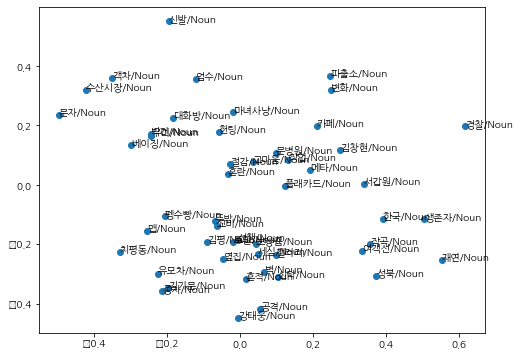

In [47]:
from numpy.random import choice
idxs = choice(range(len(vocabs)), size=50, replace=False)

plot_2d_graph(
    [v for i,v in enumerate(vocabs) if i in idxs], 
    [x for i,x in enumerate(xs) if i in idxs], 
    [y for i,y in enumerate(ys) if i in idxs]
)